In [1]:
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup

#-------Selenium imports here-------#
from selenium import webdriver
import pyautogui
import subprocess
import glob
import os
import shutil

#------------EDA imports---------# 
import math
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import linregress

#--------------Machine Learning imports-------------#
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
driver = webdriver.Chrome('C:/Users/ohada/Desktop/data_science_project/chromedriver_win32/chromedriver.exe')
driver.get('https://www.cbs.gov.il/he/Pages/default.aspx')

<ipython-input-2-530b6cf73adf>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/ohada/Desktop/data_science_project/chromedriver_win32/chromedriver.exe')


In [3]:
time.sleep(4)
driver.find_element_by_link_text("כלים ומאגרי נתונים").click()

<ipython-input-3-1b9e90232f4d>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("כלים ומאגרי נתונים").click()


In [4]:
time.sleep(3)
driver.find_element_by_link_text("מאגר הנתונים המרכזי >").click() 

<ipython-input-4-8cde15e6aade>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("מאגר הנתונים המרכזי >").click()


In [5]:
time.sleep(10) # leting the window time to load
print(pyautogui.position()) 
# starting point x = 1970, y = 343 and jupyter is opened on the
# right half of the screen (stratin point visual - *F* in File)


Point(x=1961, y=349)


In [6]:
pyautogui.click(2950,2100,1,button="left")

In [7]:
pyautogui.mouseDown(1400,90,button="left")
time.sleep(3) # keeping the corser on the left edge for expaninng the window
pyautogui.moveTo(-100,200,3)
pyautogui.mouseUp()

In [8]:
pyautogui.moveRel(1700,1000,2)  # starting the prosses of the selection

In [9]:
time.sleep(2)
pyautogui.scroll(-550)

In [10]:
time.sleep(2) 
pyautogui.scroll(-543,3)
time.sleep(4) 
pyautogui.leftClick()   # click תאונות דרכים



In [11]:
pyautogui.moveRel(-850,-300,2)
time.sleep(1) 
pyautogui.leftClick()  # click תאונות דרכים עם נפגעים
time.sleep(2) 
pyautogui.scroll(-440,3)



In [12]:
pyautogui.moveRel(800,110,2)
time.sleep(1) 
pyautogui.leftClick()  # click לפי סוג דרך וחומרה

  

In [13]:
pyautogui.moveRel(-1500,790,2)
time.sleep(1) 
pyautogui.leftClick() # click תת נושא: סמן הכל (סוגי דרכים)

In [14]:
time.sleep(6) # leting the window time to load
pyautogui.scroll(935,3)
pyautogui.moveRel(1420,0,2)
pyautogui.leftClick()
time.sleep(2) 
pyautogui.leftClick()  # click שם הסדרה: סמן הכל(לפי חומרה)
pyautogui.moveRel(-680,100,2)
pyautogui.leftClick()  # only to be able to scroll(activate the page)



In [15]:
time.sleep(2) 
pyautogui.moveRel(-500,0,2)
pyautogui.leftClick()
pyautogui.scroll(-500,3)
pyautogui.moveRel(1380,0,2)
pyautogui.leftClick()  # סוגי נתונים: ללא יהודה ושומרון

In [16]:
pyautogui.moveRel(-1600,0,2)
time.sleep(2) 
pyautogui.leftClick() # only to be able to scroll(activate the page)

In [17]:
pyautogui.scroll(-450,3)
pyautogui.leftClick()   # click- next page(page 3)
time.sleep(10) 

In [18]:
# window 3 - selecting years for the data
pyautogui.leftClick() # only to be able to scroll(activate the page)
pyautogui.scroll(300,3)
pyautogui.moveRel(1520,-1000,2) 
time.sleep(5) 
pyautogui.leftClick() # click - year 1995

In [19]:
pyautogui.moveRel(-300,-100,1) 
pyautogui.leftClick() # click - year 2013

In [20]:
pyautogui.moveRel(-1100,950,2) 
pyautogui.leftClick() # click - המשך לטבלת הנתונים
time.sleep(6) 

In [21]:
#----------------------------------------------Download xlsx File with Gui-----------------------------------------------#

In [22]:
pyautogui.moveRel(300,-1200,2)
pyautogui.leftClick()
pyautogui.scroll(200,3)
time.sleep(3)

In [23]:
pyautogui.moveRel(520,170,2)
pyautogui.leftClick()
time.sleep(20)

In [24]:
#-------------------------------------------------------End of gui-------------------------------------------------------#

In [2]:
#--------------------------------------etting the car_accidents_df and cleaning junk-------------------------------------#
def Get_cleand_main_Accidents_df(file_name,new_TO_CSV_file_name,encoding_format):
    
    df = pd.read_excel(file_name)
    df.to_csv(new_TO_CSV_file_name, encoding=encoding_format ,index = False) #convert the '.xlsx' file to '.csv'
    
    df_copy = df.copy()
    df_copy = df_copy.dropna(axis=0, how='any') # delete any row with "NaN".
    df_copy.drop(range(18,24), inplace = True) #delete row indexd [18 to 24 not included]. / we dont need that data.
    df_copy.reset_index(inplace = True, drop = True)  # set indexes to be from 0.
    
    df_copy.set_axis(['Year','Acc_on_urban_roadTotal','Acc_on_urban_road_fatal','Acc_on_urban_road_severe',
                           'Acc_on_urban_road_light','Acc_on_urban_road_at_intersectionTotal','Acc_on_urban_road_at_intersection_fatal',
                           'Acc_on_urban_road_at_intersection_severe','Acc_on_urban_road_at_intersection_light',
                           'Acc_on_urban_road_not_at_intersectionTotal','Acc_on_urban_road_not_at_intersection_fatal',
                           'Acc_on_urban_road_not_at_intersection_severe','Acc_on_urban_road_not_at_intersection_light',
                           'Acc_on_interurbanTotal','Acc_on_interurban_fatal','Acc_on_interurban_severe','Acc_on_interurban_ligth',
                           'Acc_on_interurban_at_intersectionTotal','Acc_on_interurban_at_intersection_fatal',
                           'Acc_on_interurban_at_intersection_severe','Acc_on_interurban_at_intersection_light',
                           'Acc_on_interurban_not_at_intersectionTotal','Acc_on_interurban_not_at_intersection_fatal',
                           'Acc_on_interurban_not_at_intersection_severe','Acc_on_interurban_not_at_intersection_light'], axis=1, inplace=True)
    
    # adding a missing value..
    df_copy['Acc_on_urban_roadTotal'].iloc[0:1] = df_copy['Acc_on_urban_road_fatal'].iloc[0:1] + df_copy['Acc_on_urban_road_severe'].iloc[0:1] + df_copy['Acc_on_urban_road_light'].iloc[0:1]
    df_copy['Acc_on_interurbanTotal'].iloc[0:13] = df_copy['Acc_on_interurban_fatal'].iloc[0:13] + df_copy['Acc_on_interurban_severe'].iloc[0:13] + df_copy['Acc_on_interurban_ligth'].iloc[0:13]
    return df_copy

In [3]:
def Convert_Main_Accidents_or_budget_df_From_Str_To_Numeric(df_Accidents_or_budget,convert_to_type):
    
    df_Accidents_or_budget_copy = df_Accidents_or_budget.copy()
    
    convert_cols = df_Accidents_or_budget_copy.columns
    
    for cols in convert_cols:
        
        if cols == 'Year' or cols == 'year' or cols == 'interurban_year':
            continue
        df_Accidents_or_budget_copy[cols] = df_Accidents_or_budget_copy[cols].astype(convert_to_type)    
    
    return df_Accidents_or_budget_copy

In [4]:
#-----------------------------------------Getting the last downloaded file name--------------------------------------------#
#---------------------------------sourse: https://datatofish.com/latest-file-python/ --------------------------------------#
def Get_Last_Downloaded_File(folder_path,file_type):
    
    files = glob.glob(folder_path + file_type)
    last_downloaded_file = max(files, key=os.path.getctime)
    last_downloaded_file_name = last_downloaded_file.replace('C:/Users/ohada/Downloads\\','')
    
    return last_downloaded_file_name


In [5]:
#-----------------------------------------Replacing file location-------------------------------------------------------#
#---------------------------------sourse:https://datatofish.com/move-file-python/ --------------------------------------#
def Replacing_File_Location(original,target,last_downloaded_file_name):

    original_file_path = original + last_downloaded_file_name
    target_file_path = target + last_downloaded_file_name
    
    shutil.move(original_file_path,target_file_path)


In [6]:
                                #--Getting the last downloaded file name--#
folder_path = r'C:/Users/ohada/Downloads'
file_type = '/*.xlsx'
last_downloaded_file_name = Get_Last_Downloaded_File(folder_path,file_type)

                                    #--Replacing file location--#
original = r'C:/Users/ohada/Downloads/' 
target = r'C:/Users/ohada/Desktop/data_science_project/'

Replacing_File_Location(original,target,last_downloaded_file_name) 

In [30]:
driver.quit() # closes all open drivers.

In [7]:
new_TO_CSV_file_name = 'car_eccsidents.csv'
encoding_format = 'utf-8'
df_Accidents = Get_cleand_main_Accidents_df(last_downloaded_file_name, new_TO_CSV_file_name, encoding_format)
convert_to_type = 'int32'
df_Accidents_numeric = Convert_Main_Accidents_or_budget_df_From_Str_To_Numeric(df_Accidents,convert_to_type)
df_Accidents_numeric


,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,Acc_on_interurban_severe,Acc_on_interurban_ligth,Acc_on_interurban_at_intersectionTotal,Acc_on_interurban_at_intersection_fatal,Acc_on_interurban_at_intersection_severe,Acc_on_interurban_at_intersection_light,Acc_on_interurban_not_at_intersectionTotal,Acc_on_interurban_not_at_intersection_fatal,Acc_on_interurban_not_at_intersection_severe,Acc_on_interurban_not_at_intersection_light
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,797,4053,1872,34,204,1634,3200,188,593,2419
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,779,3714,1874,36,191,1647,2906,251,588,2067
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,717,3954,2110,51,201,1858,2827,215,516,2096
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,695,3788,2026,54,200,1772,2686,175,495,2016
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,677,3849,2137,49,211,1877,2639,201,466,1972
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,657,3582,1918,51,191,1676,2531,159,466,1906
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,652,3773,2087,45,204,1838,2524,141,448,1935
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,573,3437,1828,42,182,1604,2370,146,391,1833
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,535,3435,1813,33,149,1631,2345,155,386,1804
9,2009,1195,12,96,1086,518,5,27,485,677,...,50,368,179,1,13,164,255,14,36,204


In [9]:
df_Accidents_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Year                                          14 non-null     object
 1   Acc_on_urban_roadTotal                        14 non-null     int32 
 2   Acc_on_urban_road_fatal                       14 non-null     int32 
 3   Acc_on_urban_road_severe                      14 non-null     int32 
 4   Acc_on_urban_road_light                       14 non-null     int32 
 5   Acc_on_urban_road_at_intersectionTotal        14 non-null     int32 
 6   Acc_on_urban_road_at_intersection_fatal       14 non-null     int32 
 7   Acc_on_urban_road_at_intersection_severe      14 non-null     int32 
 8   Acc_on_urban_road_at_intersection_light       14 non-null     int32 
 9   Acc_on_urban_road_not_at_intersectionTotal    14 non-null     int32 
 10  Acc_

In [10]:
def Get_List_Of_Budgets_Urban_Interurban_Roads(url,path):
    
    driver = webdriver.Chrome(path)
    driver.get(url)
    time.sleep(5)
    
    driver.find_element_by_xpath("//div[@class='item-questions-fragments-wrapper'][6]").click() # expanding the relevent tab(if you don't do that you won't see the wanted table in the page source.)
    time.sleep(10)
    html = driver.page_source # retreving the page source when the drop down is open.
    #time.sleep(3)
    
    
    soup = BeautifulSoup(html, "html.parser")
    all_divs = soup.find('tr', {'class' : 'budgetkey-item-data-wrapper'}) 
    table = soup.select('td')  # selecting all the 'td' from the table rows.
    
    main_attrs_list = list()
    year = list()
    original_budget = list()
    budget_after_changes = list()
    actual_budget = list()

    for row in table:   
        main_attrs_list.append(row.get_text().strip()) # .strip() --> removes unassacery spaces
    #print(main_attrs_list)

    for number in range(4,len(main_attrs_list),4):
        year.append(main_attrs_list[number])
    #print(year)   

    for number in range(5,len(main_attrs_list),4):
        original_budget.append(main_attrs_list[number].replace(',', ''))  # cleaning the " , " from the number as-well.
    #original_budget    

    for number in range(6,len(main_attrs_list),4):
        budget_after_changes.append(main_attrs_list[number].replace(',', '')) 
    #budget_after_changes   

    for number in range(7,len(main_attrs_list),4):
        actual_budget.append(main_attrs_list[number].replace(',', '')) 
    #actual_budget 

    driver.close()

    return year,original_budget,budget_after_changes,actual_budget # returning all the organized lists. 

In [11]:
def Create_Budget_df_From_Lists(year,urban_original_budget,urban_budget_after_changes,urban_actual_budget,Interurban_year,Interurban_original_budget ,Interurban_budget_after_changes ,Interurban_actual_budget):
    
    df = pd.DataFrame({'year':year,'urban_original_budget':urban_original_budget,
                       'urban_budget_after_changes':urban_budget_after_changes,'urban_actual_budget':urban_actual_budget,
                      'interurban_year':Interurban_year,'interurban_original_budget':Interurban_original_budget,
                       'interurban_budget_after_changes':Interurban_budget_after_changes,
                       'interurban_actual_budget':Interurban_actual_budget})
    
    df = df.drop(range(10, 19), axis=0)  # droping the unessesery years from 2014-2022.
    return df

In [12]:
#---------------------------------Adding the approximate data according to an Official source-----------------------------#
#---https://www.gov.il/he/Departments/DynamicCollectors/government-ministries-budget?skip=0&section=6&office=29&year=05---#
def Add_Missing_Years_Data(df_budget):
    
    df_budget.loc[-4] = [2000,968000000 , 1000000000,969000000,2000,1200000000,1230000000,1210000000] # adding a row
    df_budget.loc[-3] = [2001,721000000,750000000 ,730000000,2001,1300000000,1270000000,1290000000]   # adding a row
    df_budget.loc[-2] = [2002,910000000,900000000 ,910000000 ,2002,1500000000,1700000000,1500000000]  # adding a row
    df_budget.loc[-1] = [2003,1100000000,1000000000,1050000000,2003,1350000000,1450000000,1370000000] # adding a row
    
    df_budget.index = df_budget.index + 4  # shifting index
    df_budget = df_budget.sort_index()  # sorting by index
    
    return df_budget

In [13]:
#-------------------------------------Getting the lists of the urban/interurban roads budget-------------------------------#

path = "C:/Users/ohada/Desktop/data_science_project/chromedriver_win32/chromedriver.exe"

url = 'https://next.obudget.org/i/budget/00795101/2022'  # Interurban roads site
Interurban_year, Interurban_original_budget, Interurban_budget_after_changes, Interurban_actual_budget = Get_List_Of_Budgets_Urban_Interurban_Roads(url,path)

time.sleep(3)

url = 'https://next.obudget.org/i/budget/00795102/2022'  # Urban roads site
urban_year, urban_original_budget, urban_budget_after_changes, urban_actual_budget = Get_List_Of_Budgets_Urban_Interurban_Roads(url,path) 


<ipython-input-10-071782987bad>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
<ipython-input-10-071782987bad>:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath("//div[@class='item-questions-fragments-wrapper'][6]").click() # expanding the relevent tab(if you don't do that you won't see the wanted table in the page source.)


In [14]:
df_budget = Create_Budget_df_From_Lists(urban_year,urban_original_budget,urban_budget_after_changes,urban_actual_budget,Interurban_year,Interurban_original_budget ,Interurban_budget_after_changes ,Interurban_actual_budget)
df_budget_full = Add_Missing_Years_Data(df_budget)
convert_to_type = 'int64'
df_budget_full_in_numeric = Convert_Main_Accidents_or_budget_df_From_Str_To_Numeric(df_budget_full,convert_to_type)
df_budget_full_in_numeric


,year,urban_original_budget,urban_budget_after_changes,urban_actual_budget,interurban_year,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget
0,2000,968000000,1000000000,969000000,2000,1200000000,1230000000,1210000000
1,2001,721000000,750000000,730000000,2001,1300000000,1270000000,1290000000
2,2002,910000000,900000000,910000000,2002,1500000000,1700000000,1500000000
3,2003,1100000000,1000000000,1050000000,2003,1350000000,1450000000,1370000000
4,2004,739379000,849975000,790513188,2004,214140000,349108000,339922787
5,2005,777106000,905204000,805426870,2005,1898264000,2268075000,1566290034
6,2006,858406000,940364000,806904848,2006,2469051000,2515693000,2384009856
7,2007,810000000,1124956000,963627130,2007,2360000000,3261240000,3091632338
8,2008,718500000,1201728000,1057858802,2008,2990000000,3392291000,3270055193
9,2009,1010000000,1297049000,965340856,2009,3956000000,4179777000,4110556017


In [15]:
df_budget_full_in_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   year                             14 non-null     object
 1   urban_original_budget            14 non-null     int64 
 2   urban_budget_after_changes       14 non-null     int64 
 3   urban_actual_budget              14 non-null     int64 
 4   interurban_year                  14 non-null     object
 5   interurban_original_budget       14 non-null     int64 
 6   interurban_budget_after_changes  14 non-null     int64 
 7   interurban_actual_budget         14 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1008.0+ bytes


In [16]:
#-----------------------------------------Creating the final df to work with-----------------------------------------------#
def Get_Full_df(df_Accidents_numeric,df_budget_full_in_numeric):
    
    Full_df = pd.concat([df_Accidents_numeric, df_budget_full_in_numeric], axis=1) # merging the two data frames
    Full_df.drop(['year','interurban_year'],axis = 1, inplace = True)  # dropping the years duplicated columns.
    
    Full_df["total_original_budget"] = Full_df["urban_original_budget"] + Full_df["interurban_original_budget"]
    Full_df["total_budget_after_changes"] = Full_df["urban_budget_after_changes"] + Full_df["interurban_budget_after_changes"]
    Full_df["total_actual_budget"] = Full_df["urban_actual_budget"] + Full_df["interurban_actual_budget"]
    
    Full_df["accidents_urban_total"] = Full_df["Acc_on_urban_roadTotal"] + Full_df["Acc_on_urban_road_at_intersectionTotal"] + Full_df["Acc_on_urban_road_not_at_intersectionTotal"] 
    Full_df['accidents_interurban_total'] =  Full_df['Acc_on_interurbanTotal'] + Full_df['Acc_on_interurban_at_intersectionTotal'] +  Full_df['Acc_on_interurban_not_at_intersectionTotal']
    Full_df['accidents_urban_interurban_total'] = Full_df["accidents_urban_total"] + Full_df['accidents_interurban_total']
    
    return Full_df

In [17]:
full_df = Get_Full_df(df_Accidents_numeric,df_budget_full_in_numeric)
full_df

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,urban_actual_budget,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget,total_original_budget,total_budget_after_changes,total_actual_budget,accidents_urban_total,accidents_interurban_total,accidents_urban_interurban_total
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,969000000,1200000000,1230000000,1210000000,2168000000,2230000000,2179000000,29706,10144,39850
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,730000000,1300000000,1270000000,1290000000,2021000000,2020000000,2020000000,26690,9560,36250
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,910000000,1500000000,1700000000,1500000000,2410000000,2600000000,2410000000,27106,9874,36980
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,1050000000,1350000000,1450000000,1370000000,2450000000,2450000000,2420000000,26068,9424,35492
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,790513188,214140000,349108000,339922787,953519000,1199083000,1130435975,25974,9552,35526
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,805426870,1898264000,2268075000,1566290034,2675370000,3173279000,2371716904,25074,8898,33972
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,806904848,2469051000,2515693000,2384009856,3327457000,3456057000,3190914704,25158,9222,34380
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,963627130,2360000000,3261240000,3091632338,3170000000,4386196000,4055259468,23636,8396,32032
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,1057858802,2990000000,3392291000,3270055193,3708500000,4594019000,4327913995,24746,8316,33062
9,2009,1195,12,96,1086,518,5,27,485,677,...,965340856,3956000000,4179777000,4110556017,4966000000,5476826000,5075896873,2390,867,3257


In [18]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Year                                          14 non-null     object
 1   Acc_on_urban_roadTotal                        14 non-null     int32 
 2   Acc_on_urban_road_fatal                       14 non-null     int32 
 3   Acc_on_urban_road_severe                      14 non-null     int32 
 4   Acc_on_urban_road_light                       14 non-null     int32 
 5   Acc_on_urban_road_at_intersectionTotal        14 non-null     int32 
 6   Acc_on_urban_road_at_intersection_fatal       14 non-null     int32 
 7   Acc_on_urban_road_at_intersection_severe      14 non-null     int32 
 8   Acc_on_urban_road_at_intersection_light       14 non-null     int32 
 9   Acc_on_urban_road_not_at_intersectionTotal    14 non-null     int32 
 10  Acc_

In [19]:
#-------------------------------------------- **EDA**----Question 1.----------------------------------------------------#

In [20]:
full_df

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,urban_actual_budget,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget,total_original_budget,total_budget_after_changes,total_actual_budget,accidents_urban_total,accidents_interurban_total,accidents_urban_interurban_total
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,969000000,1200000000,1230000000,1210000000,2168000000,2230000000,2179000000,29706,10144,39850
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,730000000,1300000000,1270000000,1290000000,2021000000,2020000000,2020000000,26690,9560,36250
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,910000000,1500000000,1700000000,1500000000,2410000000,2600000000,2410000000,27106,9874,36980
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,1050000000,1350000000,1450000000,1370000000,2450000000,2450000000,2420000000,26068,9424,35492
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,790513188,214140000,349108000,339922787,953519000,1199083000,1130435975,25974,9552,35526
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,805426870,1898264000,2268075000,1566290034,2675370000,3173279000,2371716904,25074,8898,33972
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,806904848,2469051000,2515693000,2384009856,3327457000,3456057000,3190914704,25158,9222,34380
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,963627130,2360000000,3261240000,3091632338,3170000000,4386196000,4055259468,23636,8396,32032
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,1057858802,2990000000,3392291000,3270055193,3708500000,4594019000,4327913995,24746,8316,33062
9,2009,1195,12,96,1086,518,5,27,485,677,...,965340856,3956000000,4179777000,4110556017,4966000000,5476826000,5075896873,2390,867,3257


In [21]:
normelized_full_df = full_df.drop(['Year'],axis = 1) # we don't want to normelize the 'Year' column, so we drop it.
normelized_full_df = normelized_full_df /normelized_full_df.abs().max()
normelized_full_df.insert(0, 'Year', full_df['Year'].tolist()) # Adding the 'Year' column to the normelized df.
normelized_full_df

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,urban_actual_budget,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget,total_original_budget,total_budget_after_changes,total_actual_budget,accidents_urban_total,accidents_interurban_total,accidents_urban_interurban_total
0,2000,1.000000,1.000000,1.000000,1.000000,0.998513,0.967213,1.000000,0.978769,1.000000,...,0.758235,0.208877,0.208133,0.208538,0.322619,0.310628,0.313536,1.000000,1.000000,1.000000
1,2001,0.897462,0.944724,0.844951,0.905176,0.912926,0.803279,0.737575,0.908335,0.884842,...,0.571219,0.226284,0.214901,0.222325,0.300744,0.281376,0.290657,0.898472,0.942429,0.909661
2,2002,0.912476,0.954774,0.816938,0.923012,1.000000,1.000000,0.723658,1.000000,0.824451,...,0.712068,0.261097,0.287663,0.258518,0.358631,0.362168,0.346774,0.912476,0.973383,0.927980
3,2003,0.877533,0.924623,0.818241,0.883756,0.899676,0.803279,0.825050,0.887964,0.854312,...,0.821617,0.234987,0.245360,0.236113,0.364583,0.341273,0.348213,0.877533,0.929022,0.890640
4,2004,0.874369,0.834171,0.848860,0.877963,0.923067,0.852459,0.846918,0.910773,0.824853,...,0.618570,0.037274,0.059074,0.058584,0.141893,0.167027,0.162658,0.874369,0.941640,0.891493
5,2005,0.844072,0.804020,0.807166,0.848998,0.915765,0.786885,0.761431,0.909769,0.771826,...,0.630240,0.330420,0.383789,0.269943,0.398120,0.442023,0.341266,0.844072,0.877169,0.852497
6,2006,0.846900,0.894472,0.800000,0.851666,0.879124,0.967213,0.757455,0.869603,0.813739,...,0.631397,0.429774,0.425690,0.410873,0.495157,0.481412,0.459140,0.846900,0.909109,0.862735
7,2007,0.795664,0.738693,0.733550,0.803796,0.825446,0.983607,0.779324,0.810931,0.764997,...,0.754031,0.410792,0.551846,0.532828,0.471726,0.610976,0.583510,0.795664,0.827681,0.803814
8,2008,0.833030,0.788945,0.727687,0.846025,0.789346,0.868852,0.723658,0.777650,0.875067,...,0.827766,0.520452,0.574022,0.563578,0.551860,0.639925,0.622743,0.833030,0.819795,0.829661
9,2009,0.080455,0.060302,0.062541,0.082781,0.070038,0.081967,0.053678,0.069574,0.090653,...,0.755372,0.688599,0.707276,0.708435,0.738988,0.762896,0.730370,0.080455,0.085469,0.081731


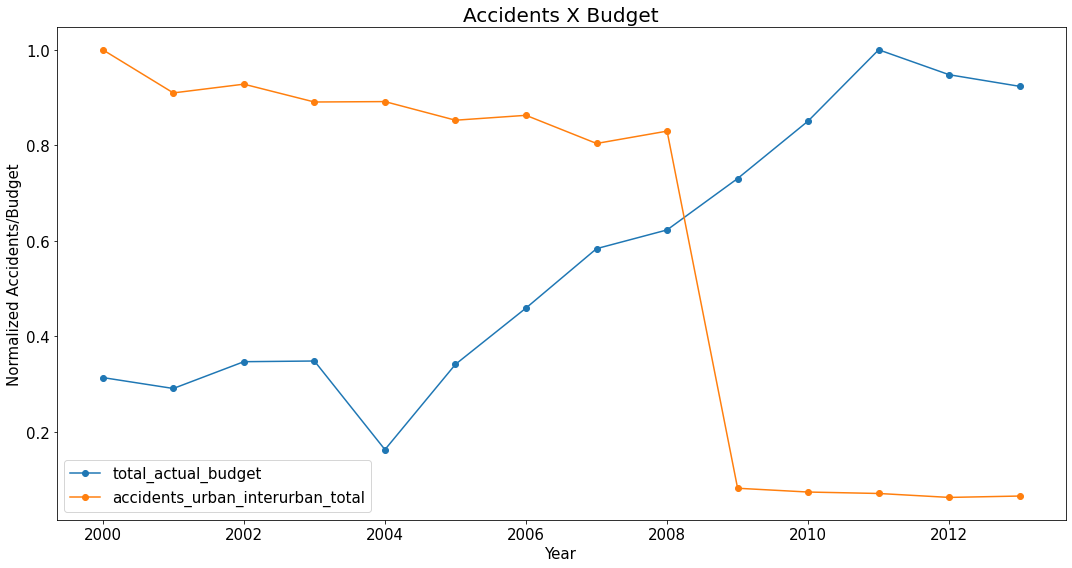

In [121]:
#--------------First visualization--------> **total_actual_budget -----> accidents_urban_interurban_total** --------------#
line_bar=normelized_full_df.groupby(['Year']).mean()[['total_actual_budget','accidents_urban_interurban_total']]
line_bar.plot(figsize = (15,8),style=['o-','o-']).legend(loc='lower left', ncol=1)
plt.legend(prop={'size': 15})
plt.xlabel('Year',fontsize=15)
plt.title('Accidents X Budget', size = 20)
plt.ylabel('Normalized Accidents/Budget',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()


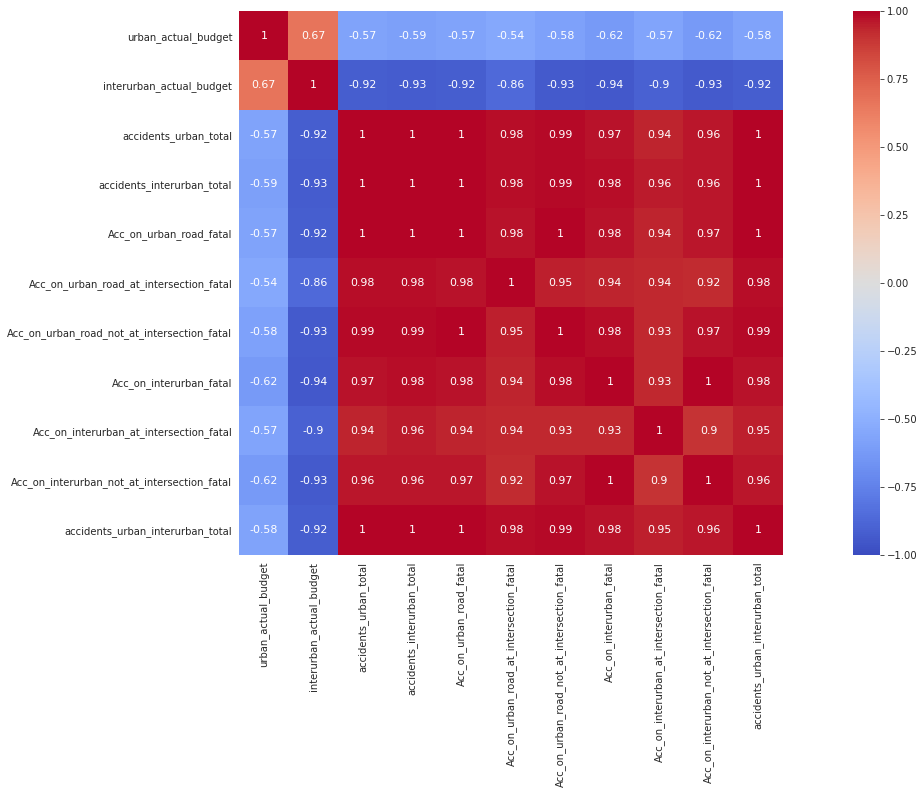

In [122]:
df_for_heatmap = pd.DataFrame({'urban_actual_budget': normelized_full_df['urban_actual_budget'].tolist(),
                                   'interurban_actual_budget':normelized_full_df['interurban_actual_budget'].tolist(),
                                   'accidents_urban_total': normelized_full_df['accidents_urban_total'].tolist(),
                                   'accidents_interurban_total':normelized_full_df['accidents_interurban_total'].tolist(),
                                   'Acc_on_urban_road_fatal':normelized_full_df['Acc_on_urban_road_fatal'].tolist(),
                                   'Acc_on_urban_road_at_intersection_fatal':normelized_full_df['Acc_on_urban_road_at_intersection_fatal'].tolist(),
                                   'Acc_on_urban_road_not_at_intersection_fatal':normelized_full_df['Acc_on_urban_road_not_at_intersection_fatal'].tolist(),
                                   'Acc_on_interurban_fatal':normelized_full_df['Acc_on_interurban_fatal'].tolist(),
                                   'Acc_on_interurban_at_intersection_fatal':normelized_full_df['Acc_on_interurban_at_intersection_fatal'].tolist(),
                                   'Acc_on_interurban_not_at_intersection_fatal':normelized_full_df['Acc_on_interurban_not_at_intersection_fatal'].tolist(),
                                   'accidents_urban_interurban_total':normelized_full_df['accidents_urban_interurban_total'].tolist()})
corr = df_for_heatmap.corr()

with sns.axes_style('whitegrid'):
    f,ax = plt.subplots(figsize=(25,10))
    ax = sns.heatmap(corr,vmax =1,vmin =-1,square=True,cmap='coolwarm',annot=True,annot_kws={"size": 11})
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    

In [24]:
normelized_full_df[['accidents_urban_interurban_total','total_actual_budget','accidents_urban_total','urban_actual_budget','accidents_urban_total','interurban_actual_budget']].corr()

,accidents_urban_interurban_total,total_actual_budget,accidents_urban_total,urban_actual_budget,accidents_urban_total,interurban_actual_budget
accidents_urban_interurban_total,1.000000,-0.915967,0.999902,-0.575740,0.999902,-0.921222
total_actual_budget,-0.915967,1.000000,-0.913017,0.715049,-0.913017,0.998086
accidents_urban_total,0.999902,-0.913017,1.000000,-0.570942,1.000000,-0.918515
urban_actual_budget,-0.575740,0.715049,-0.570942,1.000000,-0.570942,0.670444
accidents_urban_total,0.999902,-0.913017,1.000000,-0.570942,1.000000,-0.918515
interurban_actual_budget,-0.921222,0.998086,-0.918515,0.670444,-0.918515,1.000000


In [25]:
#-----------------------finding relationships between numerical variables----------------------#
#The base hypothesis that there is a dependency between the two variables is correct,
#we passed the "linregress" test. because the p-value is greater than 0.05.
#if it was less then 0.05 we would Adopt the counter-hypothesis(that there isn't a dependency between the two variables)
#Note:"chi-Square Test of Independence"-----------> is for categorial columns.

linregress(full_df['total_actual_budget'], full_df['accidents_urban_interurban_total'])

LinregressResult(slope=-7.5937668225587006e-06, intercept=53548.86512107287, rvalue=-0.9159666546155817, pvalue=4.233329211359097e-06, stderr=9.602996498551215e-07, intercept_stderr=4188.597428412267)

In [26]:
#-------------------------------**Machine Learning for Question 1.**---> Classification-----------------------------------#
#-------Is the amount of road accidents affected by the total annual budget invested in urban and interurban roads?-------#

In [27]:
full_df

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,urban_actual_budget,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget,total_original_budget,total_budget_after_changes,total_actual_budget,accidents_urban_total,accidents_interurban_total,accidents_urban_interurban_total
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,969000000,1200000000,1230000000,1210000000,2168000000,2230000000,2179000000,29706,10144,39850
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,730000000,1300000000,1270000000,1290000000,2021000000,2020000000,2020000000,26690,9560,36250
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,910000000,1500000000,1700000000,1500000000,2410000000,2600000000,2410000000,27106,9874,36980
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,1050000000,1350000000,1450000000,1370000000,2450000000,2450000000,2420000000,26068,9424,35492
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,790513188,214140000,349108000,339922787,953519000,1199083000,1130435975,25974,9552,35526
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,805426870,1898264000,2268075000,1566290034,2675370000,3173279000,2371716904,25074,8898,33972
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,806904848,2469051000,2515693000,2384009856,3327457000,3456057000,3190914704,25158,9222,34380
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,963627130,2360000000,3261240000,3091632338,3170000000,4386196000,4055259468,23636,8396,32032
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,1057858802,2990000000,3392291000,3270055193,3708500000,4594019000,4327913995,24746,8316,33062
9,2009,1195,12,96,1086,518,5,27,485,677,...,965340856,3956000000,4179777000,4110556017,4966000000,5476826000,5075896873,2390,867,3257


In [28]:
#-------------------------Creating the connection binary column and returnning the full_df with that column---------------#
def Create_binary_conection_accidents_budget_column(full_df):
    total_actual_budget_list = full_df['total_actual_budget'].tolist()
    accidents_urban_interurban_total = full_df['accidents_urban_interurban_total'].tolist()
    binary_list = []
    temp = 0
    
    for number in range(len(total_actual_budget_list)):

        if number == 0:
            binary_list.append(0) 
            continue

                        # if the budget is greater then last year and the number of accients is less then last year---------#
        if total_actual_budget_list[temp] - total_actual_budget_list[number] < 0 and accidents_urban_interurban_total[temp] - accidents_urban_interurban_total[number] > 0:
             binary_list.append(1)
                         # if the budget is less then last year and the number of accients is bigger then last year---------#
        elif total_actual_budget_list[temp] - total_actual_budget_list[number] > 0 and accidents_urban_interurban_total[temp] - accidents_urban_interurban_total[number] < 0:
                binary_list.append(1)
                         # for all the other cases we put 0.
        else:
               binary_list.append(0)
        temp += 1        
    binary_connection_df = pd.DataFrame({'binary_connection_acc_budget_total':binary_list})
    full_df_with_binary = pd.concat([full_df, binary_connection_df], axis=1)
    return full_df_with_binary

In [29]:
# **random_state**---->If there is no randomstate provided the system will use a randomstate that is generated internally. 
#So, when you run the program multiple times you might see different train/test data points and the behavior will be unpredictable.
# **test_size**----> is the number that defines the size of the test set. It's very similar to train_size.
#You should provide either train_size or test_size . If neither is given, 
#then the default share of the dataset that will be used for testing is 0.25 , or 25 percent
def split_to_train_and_test(X, y, test_ratio, rand_state):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_ratio, random_state=rand_state) 
    
    return X_train, X_test, y_train, y_test

In [30]:
#* *fit_transform**----> used on the training data so that we can scale the training data and 
# also learn the scaling parameters of that data.

def scale_features(X_train, scale_type): #scale with 'feature_range=(0, 1)
    
    if scale_type == 'minmax':
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_train_scaled = scaler.fit_transform(X_train) #
    
    if scale_type == 'standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        
        
    return scaler, X_train_scaled

In [31]:
def scale_test_features(X_test, scaler):
    
                      #--------------the prosses using the scale_features() function -------------------#
    if type(scaler) == sklearn.preprocessing._data.MinMaxScaler:
       
        scale_type = 'minmax'
        scaler_type, X_test_scaled = scale_features(X_test, scale_type)
        X_test_scaled = scaler.transform(X_test)
        return X_test_scaled
    
    if type(scaler) == sklearn.preprocessing._data.StandardScaler:
        
        scale_type = 'standard'
        scaler_type, X_test_scaled = scale_features(X_test, scale_type)
        X_test_scaled = scaler.transform(X_test)
        return X_test_scaled

In [32]:
#-------*target_column*----> the column we want to predict.
def Split_to_features_df_and_target_column(full_df_with_binary,target_col_name):
    
    X = full_df_with_binary.drop([target_col_name],axis =1)
    y = full_df_with_binary[target_col_name]
    
    return X,y

In [33]:
# A classifier is a hypothesis or discrete-valued function that is used to assign (categorical) class labels to 
# particular data points. In the email classification example, this classifier could be a hypothesis for 
# labeling emails as spam or non-spam

def train_classifier(X_train, y_train):
    
    clf_model = LogisticRegression().fit(X_train, y_train)
    return clf_model

In [34]:
# We predict the class for new data instances using our finalized classification model.

def predict(classifier, X_test, y_test):
    
    y_pred=classifier.predict(X_test)
    if type(classifier) == sklearn.linear_model._logistic.LogisticRegression:
        
        resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    
                       #---------adds another column that shwos the correct predictions-----------# 
        resDF["correct"]=abs((resDF["Actual"]^resDF["Predicted"])-1) 
        resDF[resDF["correct"]==1]

    else:
        
        y_pred = y_pred.astype(int)
        resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
                
    return resDF

In [35]:
full_df_with_binary = Create_binary_conection_accidents_budget_column(full_df) 
target_col_name = 'binary_connection_acc_budget_total'
X, y = Split_to_features_df_and_target_column(full_df_with_binary, target_col_name) #(train set) spliting the df to features and target column
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y, 0.3, 41) # test size 30%, random_state 41.

X_train  

# *X_train* and *y_train* are the train group to train the model.
# *X_test* and *y_test* are the test group to predict, using the model we traind..

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,urban_actual_budget,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget,total_original_budget,total_budget_after_changes,total_actual_budget,accidents_urban_total,accidents_interurban_total,accidents_urban_interurban_total
11,2011,1051,13,76,961,455,3,21,430,595,...,1147455933,5035000000,5909687000,5802308803,6005000000,7178995000,6949764736,2101,720,2821
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,805426870,1898264000,2268075000,1566290034,2675370000,3173279000,2371716904,25074,8898,33972
9,2009,1195,12,96,1086,518,5,27,485,677,...,965340856,3956000000,4179777000,4110556017,4966000000,5476826000,5075896873,2390,867,3257
12,2012,919,10,98,810,424,3,28,393,494,...,1183456589,5745001000,5462449000,5403010503,6720001000,6658259000,6586467092,1837,655,2492
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,730000000,1300000000,1270000000,1290000000,2021000000,2020000000,2020000000,26690,9560,36250
13,2013,972,12,99,860,423,4,30,389,548,...,1277967850,5373277000,5144830000,5139566356,6422944000,6484584000,6417534206,1943,664,2607
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,910000000,1500000000,1700000000,1500000000,2410000000,2600000000,2410000000,27106,9874,36980
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,1050000000,1350000000,1450000000,1370000000,2450000000,2450000000,2420000000,26068,9424,35492
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,969000000,1200000000,1230000000,1210000000,2168000000,2230000000,2179000000,29706,10144,39850


In [36]:
y_train 

11    1
5     1
9     1
12    0
1     0
13    1
2     0
3     1
0     0
Name: binary_connection_acc_budget_total, dtype: int64

In [37]:
X_test

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,urban_actual_budget,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget,total_original_budget,total_budget_after_changes,total_actual_budget,accidents_urban_total,accidents_interurban_total,accidents_urban_interurban_total
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,963627130,2360000000,3261240000,3091632338,3170000000,4386196000,4055259468,23636,8396,32032
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,1057858802,2990000000,3392291000,3270055193,3708500000,4594019000,4327913995,24746,8316,33062
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,806904848,2469051000,2515693000,2384009856,3327457000,3456057000,3190914704,25158,9222,34380
10,2010,1082,14,94,973,465,3,28,432,617,...,852134084,3956000000,5088033000,5061019332,4956000000,6281873000,5913153416,2164,777,2941
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,790513188,214140000,349108000,339922787,953519000,1199083000,1130435975,25974,9552,35526


In [38]:
y_test

7     1
8     0
6     0
10    1
4     1
Name: binary_connection_acc_budget_total, dtype: int64

In [39]:
standard_scaler, X_train_standard_scaled = scale_features(X_train, 'standard')
print(standard_scaler,X_train_standard_scaled)
# *X_train_standard_scaled* ----> is the trained_df scaled data.

StandardScaler() [[ 0.99972969 -1.11040993 -1.0963564  -1.13423078 -1.10769932 -1.11484862
  -1.13205749 -1.12455865 -1.11294548 -1.10080104 -1.08515563 -1.13414095
  -1.09453532 -1.11644386 -1.07452722 -1.13550548 -1.11347704 -1.13574143
  -1.06235359 -1.1458976  -1.13443346 -1.0962894  -1.05246934 -1.12816424
  -1.08773806  0.23903984  0.99818268  0.84881016  1.08342168  1.47143229
   1.45149869  1.06988024  1.44235061  1.42575715 -1.11043924 -1.11655652
  -1.11220439]
 [-0.25574481  0.74144965  0.60808486  0.76043784  0.74024166  0.8246503
   0.67299481  0.7514332   0.82957062  0.64484817  0.58030673  0.76240791
   0.62614037  0.7374615   0.59493054  0.67923521  0.75701195  0.84574426
   1.11670656  0.82556446  0.83962227  0.65635145  0.45972608  0.62257296
   0.68239512 -1.42604521 -0.85333648 -1.17909076 -0.6198077  -0.49115737
  -0.77722882 -0.69105252 -0.53186248 -0.82348775  0.74101219  0.73745226
   0.74018559]
 [ 0.58123819 -1.08719317 -1.10795124 -1.10164834 -1.0850018  -1.0

In [40]:
# scaling the X_test_df with the same scaler that we used on the X_train(IMPORTANT! Use the same scaler always.)

X_test_standard_scaled = scale_test_features(X_test, standard_scaler) 
X_test_standard_scaled

array([[ 0.16274669,  0.62552705,  0.45735196,  0.57634708,  0.63256465,
         0.61958773,  1.15434209,  0.79807388,  0.60318469,  0.6276247 ,
         0.1760683 ,  0.47354528,  0.6648707 ,  0.623661  ,  0.40462966,
         0.43494319,  0.67412047,  0.74754288,  0.71647102,  0.73017113,
         0.7497222 ,  0.53220927,  0.32320844,  0.32347207,  0.60597897,
        -1.1421001 ,  0.26413281, -0.24111651, -0.36908774,  0.04409333,
         0.02531067, -0.42945884,  0.06592244,  0.0036551 ,  0.62512018,
         0.62364541,  0.62482376],
       [ 0.37199244,  0.71500834,  0.57330035,  0.56168498,  0.73316004,
         0.53762411,  0.87355618,  0.65296954,  0.52695605,  0.90522649,
         0.45095043,  0.51853208,  0.9819753 ,  0.60552546,  0.40462966,
         0.32443014,  0.67297714,  0.73117598,  0.31623549,  0.38039561,
         0.78343473,  0.51293253,  0.41772065,  0.30353201,  0.57562186,
        -1.93193951,  0.65452904,  0.31758599, -0.02700141,  0.11472121,
         0.11918

In [41]:
classification_standard_model = train_classifier(X_train_standard_scaled, y_train) # training our model.
classification_standard_model

LogisticRegression()

In [42]:
# We predict the class for new data instances using our finalized classification model that we built in the above box..
df_standard_res = predict(classification_standard_model, X_test_standard_scaled, y_test)
df_standard_res

,Actual,Predicted,correct
7,1,1,1
8,0,0,1
6,0,0,1
10,1,1,1
4,1,0,0


In [43]:
accurracy = classification_standard_model.score(X_test_standard_scaled,y_test)
print(f"accuracy is: {accurracy}")

Predicted_values = df_standard_res['Predicted'].tolist()
print("f1 is:",metrics.f1_score(y_test, Predicted_values))

accuracy is: 0.8
f1 is: 0.8


In [44]:
#-------------------------------------------- **EDA**----Question 2.------------------------------------------------------#

In [45]:
full_df_copy = full_df.drop(['Year'],axis =1)
full_df_copy.insert(0,'Year', full_df['Year'].astype('int32')) # converting  the 'Year' olumn to int,and inserting to copy_df.

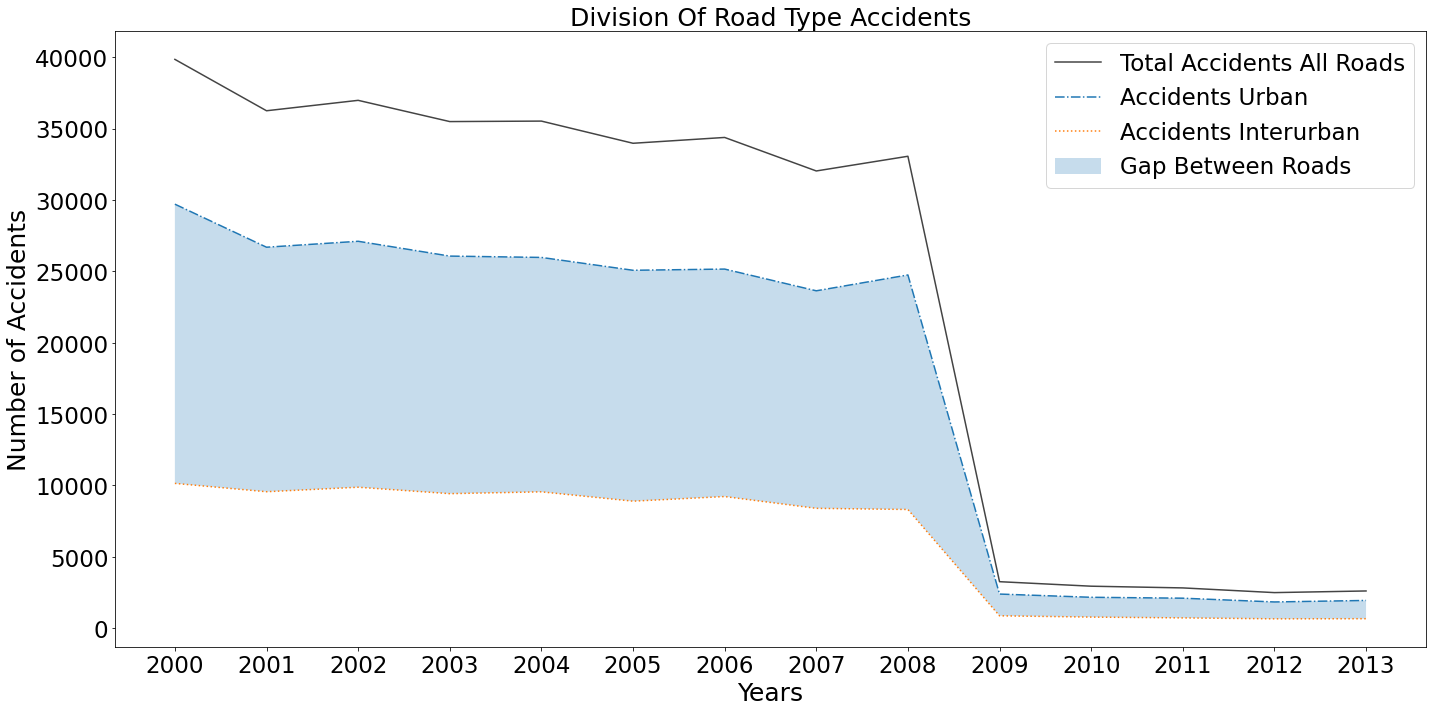

In [46]:
Year = full_df['Year']
accidents_urban_total = full_df['accidents_urban_total']
accidents_interurban_total = full_df['accidents_interurban_total']
accidents_urban_interurban_total = full_df['accidents_urban_interurban_total']

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(Year, accidents_urban_interurban_total, color='#444444',
         linestyle='-', label='Total Accidents All Roads')

plt.plot(Year, accidents_urban_total, label='Accidents Urban', linestyle='-.')

plt.plot(Year, accidents_interurban_total, label='Accidents Interurban',linestyle=':')


plt.fill_between(Year, accidents_urban_total, accidents_interurban_total,
                 where=(accidents_urban_total > accidents_interurban_total),
                 interpolate=True, alpha=0.25, label='Gap Between Roads')


plt.legend()
plt.legend(prop={'size': 23})
plt.title('Division Of Road Type Accidents',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Accidents',fontsize=25)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.tight_layout()



# Base code from:
# https://github.com/CoreyMSchafer/code_snippets/blob/master/Python/Matplotlib/05-Fill_Betweens/finished_code.py#  
# © 2022 GitHub, Inc.

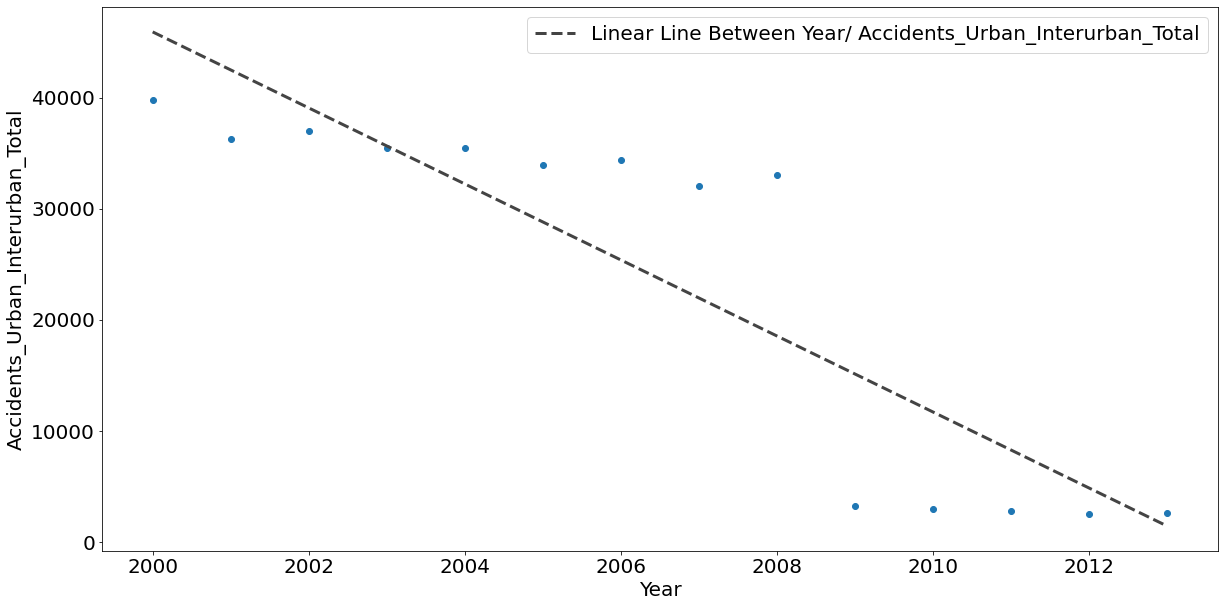

In [47]:
X_Year = full_df_copy.iloc[:,0:1].values.reshape(-1, 1)  # Year columne
Y_accidents_urban_interurban_total = full_df.iloc[:,-1].values.reshape(-1, 1)  # accidents_urban_interurban_total column
linear_regressor = LinearRegression()
linear_regressor.fit(X_Year, Y_accidents_urban_interurban_total)
Y_pred = linear_regressor.predict(X_Year)

plt.scatter(X_Year, Y_accidents_urban_interurban_total )
plt.plot(X_Year, Y_pred, color='#444444',linewidth = 3,label='Linear Line Between Year/ Accidents_Urban_Interurban_Total'
         ,linestyle='--')


plt.legend(prop={'size': 20})
plt.xlabel('Year',fontsize=20)
plt.ylabel('Accidents_Urban_Interurban_Total',fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.rcParams["figure.figsize"] = (20,10)


In [48]:
#-------------------------------**Machine Learning for Question 2.**---> Linear Regression---------------------------------#
#----------------What is the expectation for the number of road accidents in the "X" coming years?-----------------#

In [49]:
last_years_to_predict_df = full_df_copy.iloc[12:14] # the data we will try to predict at column 'accidents_urban_interurban_total'.
last_years_to_predict_df  

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,urban_actual_budget,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget,total_original_budget,total_budget_after_changes,total_actual_budget,accidents_urban_total,accidents_interurban_total,accidents_urban_interurban_total
12,2012,919,10,98,810,424,3,28,393,494,...,1183456589,5745001000,5462449000,5403010503,6720001000,6658259000,6586467092,1837,655,2492
13,2013,972,12,99,860,423,4,30,389,548,...,1277967850,5373277000,5144830000,5139566356,6422944000,6484584000,6417534206,1943,664,2607


In [50]:
full_df_copy = full_df.drop(labels=[12,13], axis=0) # droping the rows above.

target_col_name = 'accidents_urban_interurban_total'
X,y = Split_to_features_df_and_target_column(full_df_copy,target_col_name) # X is all the columns exept the target column.
X_test_new, y_test_new = Split_to_features_df_and_target_column(last_years_to_predict_df,target_col_name)

In [51]:
X

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,urban_budget_after_changes,urban_actual_budget,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget,total_original_budget,total_budget_after_changes,total_actual_budget,accidents_urban_total,accidents_interurban_total
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,1000000000,969000000,1200000000,1230000000,1210000000,2168000000,2230000000,2179000000,29706,10144
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,750000000,730000000,1300000000,1270000000,1290000000,2021000000,2020000000,2020000000,26690,9560
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,900000000,910000000,1500000000,1700000000,1500000000,2410000000,2600000000,2410000000,27106,9874
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,1000000000,1050000000,1350000000,1450000000,1370000000,2450000000,2450000000,2420000000,26068,9424
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,849975000,790513188,214140000,349108000,339922787,953519000,1199083000,1130435975,25974,9552
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,905204000,805426870,1898264000,2268075000,1566290034,2675370000,3173279000,2371716904,25074,8898
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,940364000,806904848,2469051000,2515693000,2384009856,3327457000,3456057000,3190914704,25158,9222
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,1124956000,963627130,2360000000,3261240000,3091632338,3170000000,4386196000,4055259468,23636,8396
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,1201728000,1057858802,2990000000,3392291000,3270055193,3708500000,4594019000,4327913995,24746,8316
9,2009,1195,12,96,1086,518,5,27,485,677,...,1297049000,965340856,3956000000,4179777000,4110556017,4966000000,5476826000,5075896873,2390,867


In [52]:
y

0     39850
1     36250
2     36980
3     35492
4     35526
5     33972
6     34380
7     32032
8     33062
9      3257
10     2941
11     2821
Name: accidents_urban_interurban_total, dtype: int32

In [53]:
X_train2, X_test2, y_train2, y_test2 = split_to_train_and_test(X, y,0.25, 25)

In [54]:
X_test2

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,urban_budget_after_changes,urban_actual_budget,interurban_original_budget,interurban_budget_after_changes,interurban_actual_budget,total_original_budget,total_budget_after_changes,total_actual_budget,accidents_urban_total,accidents_interurban_total
9,2009,1195,12,96,1086,518,5,27,485,677,...,1297049000,965340856,3956000000,4179777000,4110556017,4966000000,5476826000,5075896873,2390,867
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,750000000,730000000,1300000000,1270000000,1290000000,2021000000,2020000000,2020000000,26690,9560
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,1000000000,1050000000,1350000000,1450000000,1370000000,2450000000,2450000000,2420000000,26068,9424


In [55]:
lr = LinearRegression(fit_intercept = False) # dont need to go through the head of Cartesian coordinate system.  
classifier = lr.fit(X_train2,y_train2) # training the classifier.  
y_pred2_df = predict(classifier, X_test2,y_test2) # predicting the result. 
y_pred2_df


,Actual,Predicted
9,3257,3248
1,36250,36207
3,35492,35460


In [56]:
y_pred2 =y_pred2_df['Predicted'].tolist()
y_pred2

[3248, 36207, 35460]

In [57]:
print(f"mse: {metrics.mean_squared_error(y_test2,y_pred2)}")
print(f"r^2: {metrics.r2_score(y_test2,y_pred2)}")

mse: 984.6666666666666
r^2: 0.9999958359330129


In [58]:
for key,value in sorted(dict(zip(full_df_copy.columns,(classifier.coef_))).items(),key = lambda x:x[1],reverse = True):
    print(key,value)

accidents_urban_total 0.666736417889543
accidents_interurban_total 0.5383607624794284
Acc_on_urban_roadTotal 0.3336074419861069
Acc_on_interurbanTotal 0.268912618276847
Acc_on_interurban_ligth 0.24329466521957105
Acc_on_urban_road_at_intersectionTotal 0.20515675185217627
Acc_on_urban_road_severe 0.17609499410089866
Acc_on_urban_road_light 0.16063016084839107
Acc_on_interurban_at_intersectionTotal 0.15993375355080416
Acc_on_interurban_not_at_intersection_light 0.13544807411346804
Acc_on_urban_road_not_at_intersectionTotal 0.12797222384318432
Acc_on_interurban_not_at_intersectionTotal 0.10951439065177741
Acc_on_interurban_at_intersection_light 0.10784659110610273
Acc_on_urban_road_at_intersection_severe 0.10665666161403117
Acc_on_urban_road_at_intersection_light 0.09403702327476259
Year 0.08221144006612208
Acc_on_urban_road_not_at_intersection_severe 0.06943833255410452
Acc_on_urban_road_not_at_intersection_light 0.06712866332480125
Acc_on_interurban_severe 0.059829702392753
Acc_on_inter

In [59]:
y_new_predicted = classifier.predict(X_test_new).astype(int)
prediction_df = pd.DataFrame({'Actual':y_test_new,'Predicted':y_new_predicted})
prediction_df

,Actual,Predicted
12,2492,2518
13,2607,2616


In [60]:
print(f"r^2: {metrics.r2_score(y_test_new,y_new_predicted)}")

r^2: 0.8855198487712665


In [61]:
#-------------------------------------------- **EDA**----Question 3.------------------------------------------------------#

In [62]:
#----calculating and adding the columns we want for this section.----# 
full_df_with_total_sevirety = full_df.copy()
full_df_with_total_sevirety['total_urban_fatal'] = full_df['Acc_on_urban_road_fatal'] + full_df['Acc_on_urban_road_at_intersection_fatal'] + full_df['Acc_on_urban_road_not_at_intersection_fatal']
full_df_with_total_sevirety['total_urban_severe'] = full_df['Acc_on_urban_road_severe'] + full_df['Acc_on_urban_road_at_intersection_severe'] + full_df['Acc_on_urban_road_not_at_intersection_severe']
full_df_with_total_sevirety['total_urban_light'] = full_df['Acc_on_urban_road_light'] + full_df['Acc_on_urban_road_at_intersection_light'] + full_df['Acc_on_urban_road_not_at_intersection_light']


full_df_with_total_sevirety['total_interurban_fatal'] = full_df['Acc_on_interurban_fatal'] + full_df['Acc_on_interurban_at_intersection_fatal'] + full_df['Acc_on_interurban_not_at_intersection_fatal']
full_df_with_total_sevirety['total_interurban_severe'] = full_df['Acc_on_interurban_severe'] + full_df['Acc_on_interurban_at_intersection_severe'] + full_df['Acc_on_interurban_not_at_intersection_severe']
full_df_with_total_sevirety['total_interurban_light'] = full_df['Acc_on_interurban_ligth'] + full_df['Acc_on_interurban_not_at_intersection_light'] + full_df['Acc_on_urban_road_not_at_intersection_light']
full_df_with_total_sevirety


,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,total_actual_budget,accidents_urban_total,accidents_interurban_total,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,2179000000,29706,10144,39850,398,3070,26238,444,1594,12768
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,2020000000,26690,9560,36250,376,2594,23750,574,1558,11324
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,2410000000,27106,9874,36980,380,2508,24218,532,1434,11188
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,2420000000,26068,9424,35492,368,2512,23188,458,1390,11208
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,1130435975,25974,9552,35526,332,2606,23036,500,1354,10990
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,2371716904,25074,8898,33972,320,2478,22276,420,1314,10284
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,3190914704,25158,9222,34380,356,2456,22346,372,1304,10819
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,4055259468,23636,8396,32032,294,2252,21090,376,1146,10162
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,4327913995,24746,8316,33062,314,2234,22198,376,1070,10917
9,2009,1195,12,96,1086,518,5,27,485,677,...,5075896873,2390,867,3257,24,191,2172,30,99,1173


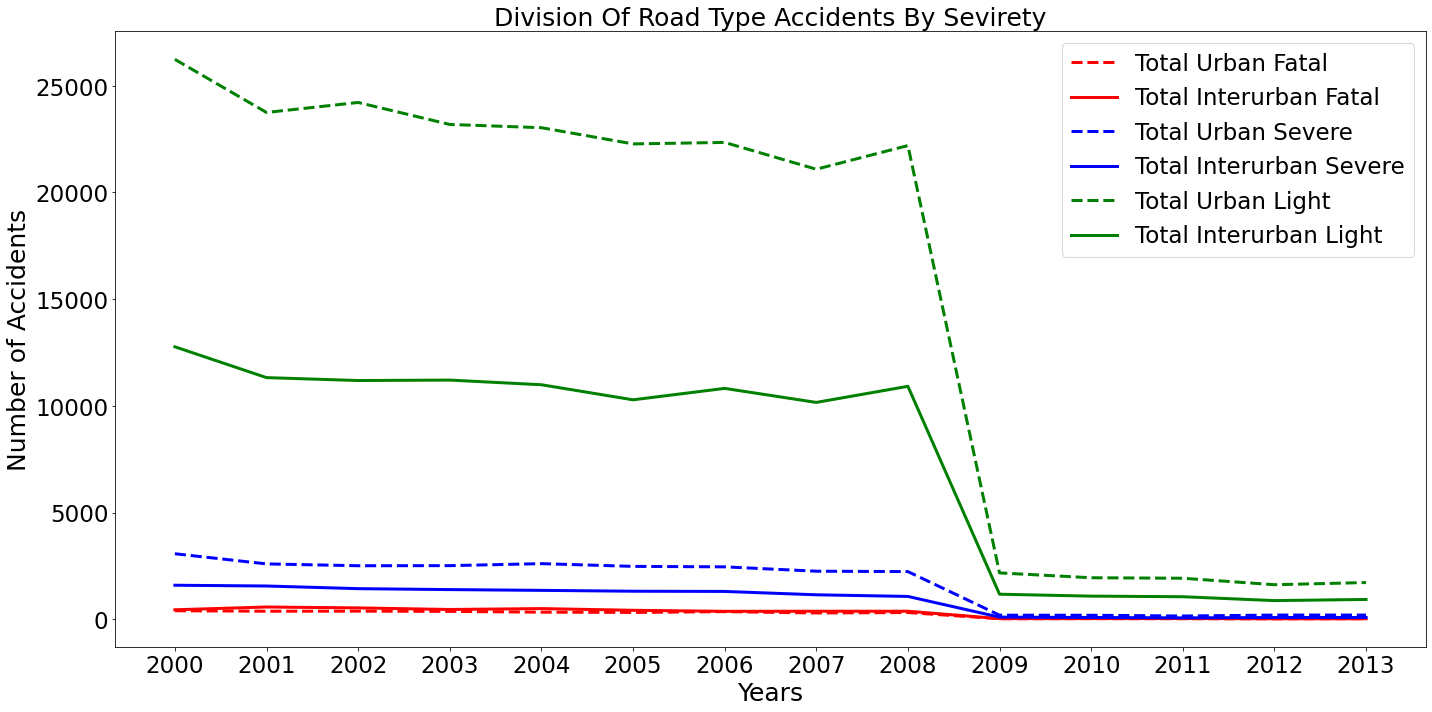

In [63]:
Year = full_df['Year']
total_urban_fatal = full_df_with_total_sevirety['total_urban_fatal']
total_interurban_fatal = full_df_with_total_sevirety['total_interurban_fatal']
total_urban_severe = full_df_with_total_sevirety['total_urban_severe']
total_interurban_severe = full_df_with_total_sevirety['total_interurban_severe']
total_urban_light = full_df_with_total_sevirety['total_urban_light']
total_interurban_light = full_df_with_total_sevirety['total_interurban_light']

plt.plot(Year, total_urban_fatal, color='red', label='Total Urban Fatal', linestyle='--', linewidth = 3)

plt.plot(Year, total_interurban_fatal,color='red', label='Total Interurban Fatal', linestyle='solid', linewidth = 3)

plt.plot(Year, total_urban_severe,color='blue', label='Total Urban Severe',linestyle='--', linewidth = 3)

plt.plot(Year, total_interurban_severe, color='blue', label='Total Interurban Severe',linestyle='solid',linewidth = 3)

plt.plot(Year, total_urban_light, color='green', label='Total Urban Light',linestyle='--', linewidth = 3)

plt.plot(Year, total_interurban_light, color='green', label='Total Interurban Light',linestyle='solid', linewidth = 3)

'''plt.fill_between(Year, accidents_urban_total, accidents_interurban_total,
                 where=(accidents_urban_total > accidents_interurban_total),
                 interpolate=True, alpha=0.25, label='Gap Between Roads')
'''

plt.legend()
plt.legend(prop={'size': 23})
plt.title('Division Of Road Type Accidents By Sevirety',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Accidents',fontsize=25)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,10)
plt.show()


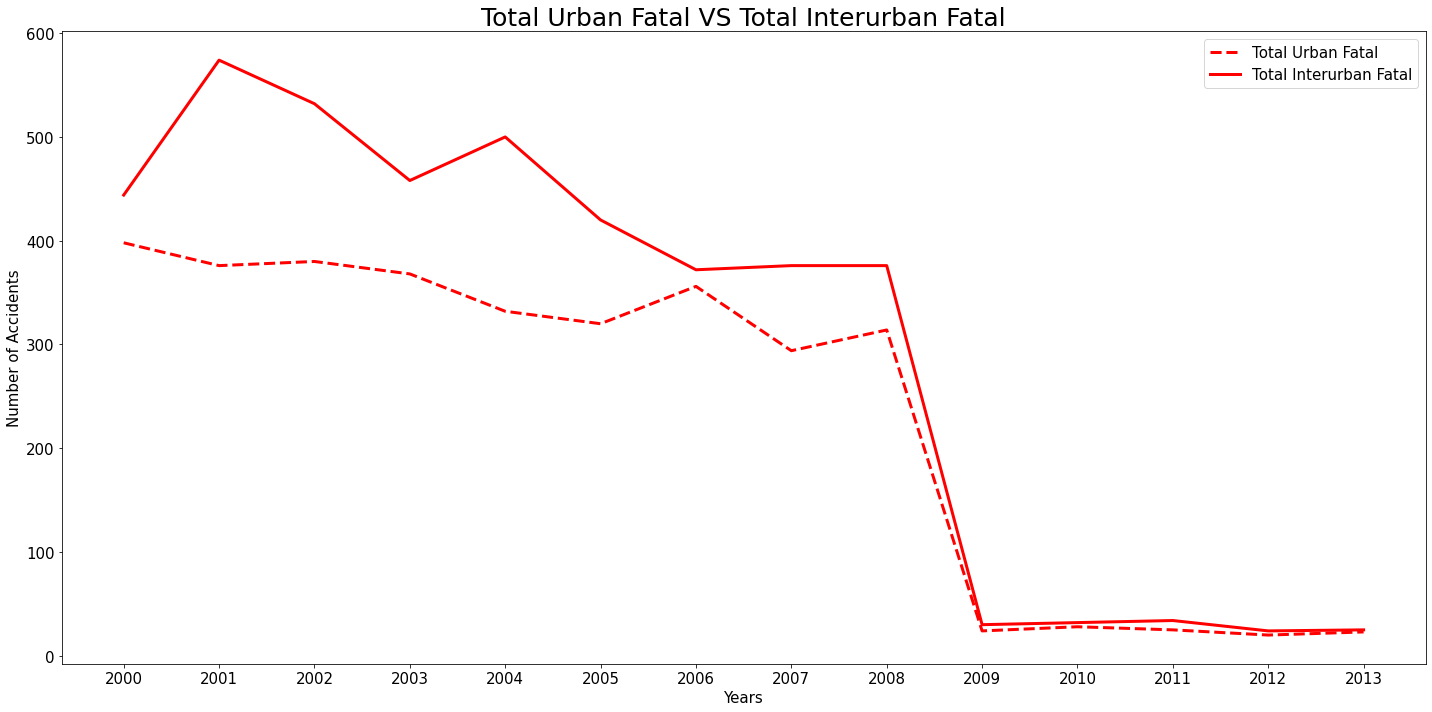

In [64]:
plt.plot(Year, total_urban_fatal, color='red', label='Total Urban Fatal', linestyle='--', linewidth = 3)

plt.plot(Year, total_interurban_fatal,color='red', label='Total Interurban Fatal', linestyle='solid', linewidth = 3)

plt.legend()
plt.legend(prop={'size': 15})
plt.title('Total Urban Fatal VS Total Interurban Fatal',fontsize=25)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Accidents',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (15,5)
plt.show()


Text(0.5, 1.0, 'Total Urban Severe VS Total Interurban Severe')

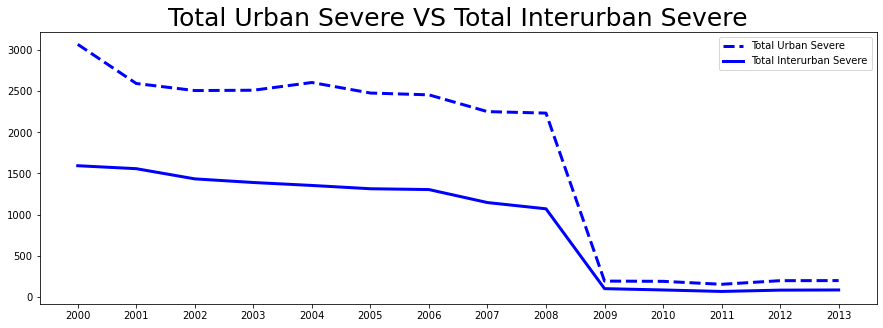

In [65]:
plt.plot(Year, total_urban_severe,color='blue', label='Total Urban Severe',linestyle='--', linewidth = 3)

plt.plot(Year, total_interurban_severe, color='blue', label='Total Interurban Severe',linestyle='solid',linewidth = 3)
plt.legend()
plt.title('Total Urban Severe VS Total Interurban Severe',fontsize=25)

Text(0.5, 1.0, 'Total Urban Light VS Total Interurban Light')

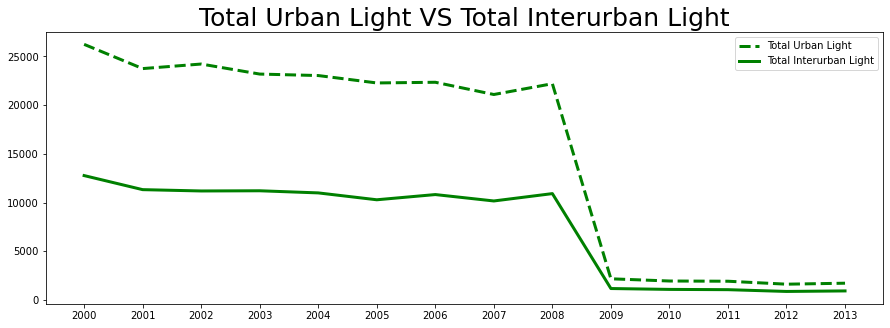

In [66]:
plt.plot(Year, total_urban_light, color='green', label='Total Urban Light',linestyle='--', linewidth = 3)

plt.plot(Year, total_interurban_light, color='green', label='Total Interurban Light',linestyle='solid', linewidth = 3)
plt.legend()
plt.title('Total Urban Light VS Total Interurban Light',fontsize=25)

In [67]:
#-------------------------------**Machine Learning for Question 3.**---> Classification--------------------------------#
#------------------Does the severity of the accident depend on the type of road - urban / non-urban?-------------------#

In [68]:
#---0 represents that the interurban amount of accidents in the specific severity section is greater then the amount of accidents in urban road in the specific severity section---#
#---1 represents that the urban amount of accidents in the specific severity section is greater then the amount of accidents in interban road in the specific severity section---#
def add_fatal_severe_light_binary_column(full_df_with_total_sevirety):
    
    total_urban_fatal = full_df_with_total_sevirety['total_urban_fatal'].tolist()
    total_interurban_fatal = full_df_with_total_sevirety['total_interurban_fatal'].tolist()
    total_urban_severe = full_df_with_total_sevirety['total_urban_severe'].tolist()
    total_interurban_severe = full_df_with_total_sevirety['total_interurban_severe'].tolist()
    total_urban_light = full_df_with_total_sevirety['total_urban_light'].tolist()
    total_interurban_light = full_df_with_total_sevirety['total_interurban_light'].tolist()
    
    fatal_binary_list = []
    severe_binary_list = []
    light_binary_list = []
    
    temp = 0
    
    for number in total_urban_fatal:
        if number - total_interurban_fatal[temp] < 0:
            fatal_binary_list.append(0)
        else:
            fatal_binary_list.append(1)
        temp += 1
    temp = 0
    for number in total_urban_severe:
        if number - total_urban_severe[temp] < 0:
            severe_binary_list.append(0)
        else:
            severe_binary_list.append(1)
        temp += 1
    temp = 0   
    for number in total_urban_light:
        if number - total_urban_light[temp] < 0:
            light_binary_list.append(0)
        else:
            light_binary_list.append(1)
        temp += 1   
    
    binary_connection_df = pd.DataFrame({'fatal_binary':fatal_binary_list,
                                        'severe_binary':severe_binary_list,
                                        'light_binary_list':light_binary_list})
    full_df_with_binary = pd.concat([full_df_with_total_sevirety, binary_connection_df], axis=1)
    
    return full_df_with_binary

In [69]:
full_df_with_total_sevirety

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,total_actual_budget,accidents_urban_total,accidents_interurban_total,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,2179000000,29706,10144,39850,398,3070,26238,444,1594,12768
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,2020000000,26690,9560,36250,376,2594,23750,574,1558,11324
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,2410000000,27106,9874,36980,380,2508,24218,532,1434,11188
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,2420000000,26068,9424,35492,368,2512,23188,458,1390,11208
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,1130435975,25974,9552,35526,332,2606,23036,500,1354,10990
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,2371716904,25074,8898,33972,320,2478,22276,420,1314,10284
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,3190914704,25158,9222,34380,356,2456,22346,372,1304,10819
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,4055259468,23636,8396,32032,294,2252,21090,376,1146,10162
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,4327913995,24746,8316,33062,314,2234,22198,376,1070,10917
9,2009,1195,12,96,1086,518,5,27,485,677,...,5075896873,2390,867,3257,24,191,2172,30,99,1173


In [70]:
linregress(full_df_with_total_sevirety['total_urban_fatal'], full_df_with_total_sevirety['total_interurban_fatal'])

LinregressResult(slope=1.2947071142048134, intercept=-1.5111270056630133, rvalue=0.9765133856364325, pvalue=2.303858227289168e-09, stderr=0.08246369659674835, intercept_stderr=23.187553908019506)

In [71]:
linregress(full_df_with_total_sevirety['total_urban_severe'], full_df_with_total_sevirety['total_interurban_severe'])

LinregressResult(slope=0.5444542428489317, intercept=-20.90225539226094, rvalue=0.994199341147095, pvalue=5.431896830092979e-13, stderr=0.017002791883815475, intercept_stderr=34.59318010571729)

In [72]:
linregress(full_df_with_total_sevirety['total_urban_light'], full_df_with_total_sevirety['total_interurban_light'])

LinregressResult(slope=0.4725320864610233, intercept=135.44708570563853, rvalue=0.9992817556829348, pvalue=1.9790495734226796e-18, stderr=0.005172801617855314, intercept_stderr=96.36084654687487)

In [73]:
full_df_with_total_sevirety_binary = add_fatal_severe_light_binary_column(full_df_with_total_sevirety)
full_df_with_total_sevirety_binary

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light,fatal_binary,severe_binary,light_binary_list
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,39850,398,3070,26238,444,1594,12768,0,1,1
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,36250,376,2594,23750,574,1558,11324,0,1,1
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,36980,380,2508,24218,532,1434,11188,0,1,1
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,35492,368,2512,23188,458,1390,11208,0,1,1
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,35526,332,2606,23036,500,1354,10990,0,1,1
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,33972,320,2478,22276,420,1314,10284,0,1,1
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,34380,356,2456,22346,372,1304,10819,0,1,1
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,32032,294,2252,21090,376,1146,10162,0,1,1
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,33062,314,2234,22198,376,1070,10917,0,1,1
9,2009,1195,12,96,1086,518,5,27,485,677,...,3257,24,191,2172,30,99,1173,0,1,1


In [74]:
#----------currupting the first row of the binery colums to be able to go through the machine learning prosses.-----------#
#----------------------the classifier cannot work when it gets only 1 class (0 or 1) it needs 0 and 1---------------------#
full_df_with_total_sevirety_binary['fatal_binary'].iloc[0] = 1
full_df_with_total_sevirety_binary['severe_binary'].iloc[0] = 0
full_df_with_total_sevirety_binary['light_binary_list'].iloc[0] = 0
full_df_with_total_sevirety_binary

C:\Users\ohada\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light,fatal_binary,severe_binary,light_binary_list
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,39850,398,3070,26238,444,1594,12768,1,0,0
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,36250,376,2594,23750,574,1558,11324,0,1,1
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,36980,380,2508,24218,532,1434,11188,0,1,1
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,35492,368,2512,23188,458,1390,11208,0,1,1
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,35526,332,2606,23036,500,1354,10990,0,1,1
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,33972,320,2478,22276,420,1314,10284,0,1,1
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,34380,356,2456,22346,372,1304,10819,0,1,1
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,32032,294,2252,21090,376,1146,10162,0,1,1
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,33062,314,2234,22198,376,1070,10917,0,1,1
9,2009,1195,12,96,1086,518,5,27,485,677,...,3257,24,191,2172,30,99,1173,0,1,1


In [75]:
target_col_name = 'fatal_binary'
X, y = Split_to_features_df_and_target_column(full_df_with_total_sevirety_binary, target_col_name) #(train set) spliting the df to features and target column
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y, 0.3, 41) # test size 30%, random_state 41.

X_train

# *X_train* and *y_train* are the train group to train the model.
# *X_test* and *y_test* are the test group to predict, using the model we traind..

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,accidents_interurban_total,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light,severe_binary,light_binary_list
11,2011,1051,13,76,961,455,3,21,430,595,...,720,2821,25,152,1922,34,65,1056,1,1
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,8898,33972,320,2478,22276,420,1314,10284,1,1
9,2009,1195,12,96,1086,518,5,27,485,677,...,867,3257,24,191,2172,30,99,1173,1,1
12,2012,919,10,98,810,424,3,28,393,494,...,655,2492,20,196,1619,24,81,874,1,1
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,9560,36250,376,2594,23750,574,1558,11324,1,1
13,2013,972,12,99,860,423,4,30,389,548,...,664,2607,23,197,1720,25,83,928,1,1
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,9874,36980,380,2508,24218,532,1434,11188,1,1
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,9424,35492,368,2512,23188,458,1390,11208,1,1
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,10144,39850,398,3070,26238,444,1594,12768,0,0


In [76]:
y_train 

11    0
5     0
9     0
12    0
1     0
13    0
2     0
3     0
0     1
Name: fatal_binary, dtype: int64

In [77]:
X_test

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,accidents_interurban_total,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light,severe_binary,light_binary_list
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,8396,32032,294,2252,21090,376,1146,10162,1,1
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,8316,33062,314,2234,22198,376,1070,10917,1,1
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,9222,34380,356,2456,22346,372,1304,10819,1,1
10,2010,1082,14,94,973,465,3,28,432,617,...,777,2941,28,188,1945,32,83,1084,1,1
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,9552,35526,332,2606,23036,500,1354,10990,1,1


In [78]:
y_test

7     0
8     0
6     0
10    0
4     0
Name: fatal_binary, dtype: int64

In [79]:
standard_scaler, X_train_standard_scaled = scale_features(X_train, 'standard')
print(standard_scaler,X_train_standard_scaled)
# *X_train_standard_scaled* ----> is the trained_df scaled data.

StandardScaler() [[ 0.99972969 -1.11040993 -1.0963564  -1.13423078 -1.10769932 -1.11484862
  -1.13205749 -1.12455865 -1.11294548 -1.10080104 -1.08515563 -1.13414095
  -1.09453532 -1.11644386 -1.07452722 -1.13550548 -1.11347704 -1.13574143
  -1.06235359 -1.1458976  -1.13443346 -1.0962894  -1.05246934 -1.12816424
  -1.08773806  0.23903984  0.99818268  0.84881016  1.08342168  1.47143229
   1.45149869  1.06988024  1.44235061  1.42575715 -1.11043924 -1.11655652
  -1.11220439 -1.0993025  -1.13382412 -1.10767655 -1.07347366 -1.13549818
  -1.10115771  0.35355339  0.35355339]
 [-0.25574481  0.74144965  0.60808486  0.76043784  0.74024166  0.8246503
   0.67299481  0.7514332   0.82957062  0.64484817  0.58030673  0.76240791
   0.62614037  0.7374615   0.59493054  0.67923521  0.75701195  0.84574426
   1.11670656  0.82556446  0.83962227  0.65635145  0.45972608  0.62257296
   0.68239512 -1.42604521 -0.85333648 -1.17909076 -0.6198077  -0.49115737
  -0.77722882 -0.69105252 -0.53186248 -0.82348775  0.7410

In [80]:
# scaling the X_test_df with the same scaler that we used on the X_train(IMPORTANT! Use the same scaler always.)

X_test_standard_scaled = scale_test_features(X_test, standard_scaler) 
X_test_standard_scaled

array([[ 0.16274669,  0.62552705,  0.45735196,  0.57634708,  0.63256465,
         0.61958773,  1.15434209,  0.79807388,  0.60318469,  0.6276247 ,
         0.1760683 ,  0.47354528,  0.6648707 ,  0.623661  ,  0.40462966,
         0.43494319,  0.67412047,  0.74754288,  0.71647102,  0.73017113,
         0.7497222 ,  0.53220927,  0.32320844,  0.32347207,  0.60597897,
        -1.1421001 ,  0.26413281, -0.24111651, -0.36908774,  0.04409333,
         0.02531067, -0.42945884,  0.06592244,  0.0036551 ,  0.62512018,
         0.62364541,  0.62482376,  0.4579891 ,  0.57641338,  0.63256749,
         0.40489409,  0.43527699,  0.65802432,  0.35355339,  0.35355339],
       [ 0.37199244,  0.71500834,  0.57330035,  0.56168498,  0.73316004,
         0.53762411,  0.87355618,  0.65296954,  0.52695605,  0.90522649,
         0.45095043,  0.51853208,  0.9819753 ,  0.60552546,  0.40462966,
         0.32443014,  0.67297714,  0.73117598,  0.31623549,  0.38039561,
         0.78343473,  0.51293253,  0.41772065,  0.

In [81]:
classification_standard_model = train_classifier(X_train_standard_scaled, y_train) # training our model.
classification_standard_model

LogisticRegression()

In [82]:
# We predict the class for new data instances using our finalized classification model that we built in the above box..
df_standard_res = predict(classification_standard_model, X_test_standard_scaled, y_test)
df_standard_res

,Actual,Predicted,correct
7,0,0,1
8,0,0,1
6,0,0,1
10,0,0,1
4,0,0,1


In [83]:
accurracy = classification_standard_model.score(X_test_standard_scaled,y_test)
print(f"accuracy is: {accurracy}")

accuracy is: 1.0


In [84]:
target_col_name = 'severe_binary'
X, y = Split_to_features_df_and_target_column(full_df_with_total_sevirety_binary, target_col_name) #(train set) spliting the df to features and target column
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y, 0.3, 41) # test size 30%, random_state 41.

X_train

# *X_train* and *y_train* are the train group to train the model.
# *X_test* and *y_test* are the test group to predict, using the model we traind..

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,accidents_interurban_total,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light,fatal_binary,light_binary_list
11,2011,1051,13,76,961,455,3,21,430,595,...,720,2821,25,152,1922,34,65,1056,0,1
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,8898,33972,320,2478,22276,420,1314,10284,0,1
9,2009,1195,12,96,1086,518,5,27,485,677,...,867,3257,24,191,2172,30,99,1173,0,1
12,2012,919,10,98,810,424,3,28,393,494,...,655,2492,20,196,1619,24,81,874,0,1
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,9560,36250,376,2594,23750,574,1558,11324,0,1
13,2013,972,12,99,860,423,4,30,389,548,...,664,2607,23,197,1720,25,83,928,0,1
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,9874,36980,380,2508,24218,532,1434,11188,0,1
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,9424,35492,368,2512,23188,458,1390,11208,0,1
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,10144,39850,398,3070,26238,444,1594,12768,1,0


In [85]:
y_train 

11    1
5     1
9     1
12    1
1     1
13    1
2     1
3     1
0     0
Name: severe_binary, dtype: int64

In [86]:
X_test

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,accidents_interurban_total,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light,fatal_binary,light_binary_list
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,8396,32032,294,2252,21090,376,1146,10162,0,1
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,8316,33062,314,2234,22198,376,1070,10917,0,1
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,9222,34380,356,2456,22346,372,1304,10819,0,1
10,2010,1082,14,94,973,465,3,28,432,617,...,777,2941,28,188,1945,32,83,1084,0,1
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,9552,35526,332,2606,23036,500,1354,10990,0,1


In [87]:
y_test

7     1
8     1
6     1
10    1
4     1
Name: severe_binary, dtype: int64

In [88]:
standard_scaler, X_train_standard_scaled = scale_features(X_train, 'standard')
print(standard_scaler,X_train_standard_scaled)
# *X_train_standard_scaled* ----> is the trained_df scaled data.

StandardScaler() [[ 0.99972969 -1.11040993 -1.0963564  -1.13423078 -1.10769932 -1.11484862
  -1.13205749 -1.12455865 -1.11294548 -1.10080104 -1.08515563 -1.13414095
  -1.09453532 -1.11644386 -1.07452722 -1.13550548 -1.11347704 -1.13574143
  -1.06235359 -1.1458976  -1.13443346 -1.0962894  -1.05246934 -1.12816424
  -1.08773806  0.23903984  0.99818268  0.84881016  1.08342168  1.47143229
   1.45149869  1.06988024  1.44235061  1.42575715 -1.11043924 -1.11655652
  -1.11220439 -1.0993025  -1.13382412 -1.10767655 -1.07347366 -1.13549818
  -1.10115771 -0.35355339  0.35355339]
 [-0.25574481  0.74144965  0.60808486  0.76043784  0.74024166  0.8246503
   0.67299481  0.7514332   0.82957062  0.64484817  0.58030673  0.76240791
   0.62614037  0.7374615   0.59493054  0.67923521  0.75701195  0.84574426
   1.11670656  0.82556446  0.83962227  0.65635145  0.45972608  0.62257296
   0.68239512 -1.42604521 -0.85333648 -1.17909076 -0.6198077  -0.49115737
  -0.77722882 -0.69105252 -0.53186248 -0.82348775  0.7410

In [89]:
# scaling the X_test_df with the same scaler that we used on the X_train(IMPORTANT! Use the same scaler always.)

X_test_standard_scaled = scale_test_features(X_test, standard_scaler) 
X_test_standard_scaled

array([[ 0.16274669,  0.62552705,  0.45735196,  0.57634708,  0.63256465,
         0.61958773,  1.15434209,  0.79807388,  0.60318469,  0.6276247 ,
         0.1760683 ,  0.47354528,  0.6648707 ,  0.623661  ,  0.40462966,
         0.43494319,  0.67412047,  0.74754288,  0.71647102,  0.73017113,
         0.7497222 ,  0.53220927,  0.32320844,  0.32347207,  0.60597897,
        -1.1421001 ,  0.26413281, -0.24111651, -0.36908774,  0.04409333,
         0.02531067, -0.42945884,  0.06592244,  0.0036551 ,  0.62512018,
         0.62364541,  0.62482376,  0.4579891 ,  0.57641338,  0.63256749,
         0.40489409,  0.43527699,  0.65802432, -0.35355339,  0.35355339],
       [ 0.37199244,  0.71500834,  0.57330035,  0.56168498,  0.73316004,
         0.53762411,  0.87355618,  0.65296954,  0.52695605,  0.90522649,
         0.45095043,  0.51853208,  0.9819753 ,  0.60552546,  0.40462966,
         0.32443014,  0.67297714,  0.73117598,  0.31623549,  0.38039561,
         0.78343473,  0.51293253,  0.41772065,  0.

In [90]:
classification_standard_model = train_classifier(X_train_standard_scaled, y_train) # training our model.
classification_standard_model

LogisticRegression()

In [91]:
# We predict the class for new data instances using our finalized classification model that we built in the above box..
df_standard_res = predict(classification_standard_model, X_test_standard_scaled, y_test)
df_standard_res

,Actual,Predicted,correct
7,1,1,1
8,1,1,1
6,1,1,1
10,1,1,1
4,1,1,1


In [92]:
accurracy = classification_standard_model.score(X_test_standard_scaled,y_test)
print(f"severe_binary accuracy = {accurracy}")

severe_binary accuracy = 1.0


In [93]:
target_col_name = 'light_binary_list'
X, y = Split_to_features_df_and_target_column(full_df_with_total_sevirety_binary, target_col_name) #(train set) spliting the df to features and target column
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y, 0.3, 41) # test size 30%, random_state 41.

X_train
# *X_train* and *y_train* are the train group to train the model.
# *X_test* and *y_test* are the test group to predict, using the model we traind..

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,accidents_interurban_total,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light,fatal_binary,severe_binary
11,2011,1051,13,76,961,455,3,21,430,595,...,720,2821,25,152,1922,34,65,1056,0,1
5,2005,12537,160,1239,11138,6773,48,383,6342,5764,...,8898,33972,320,2478,22276,420,1314,10284,0,1
9,2009,1195,12,96,1086,518,5,27,485,677,...,867,3257,24,191,2172,30,99,1173,0,1
12,2012,919,10,98,810,424,3,28,393,494,...,655,2492,20,196,1619,24,81,874,0,1
1,2001,13330,188,1297,11875,6752,49,371,6332,6608,...,9560,36250,376,2594,23750,574,1558,11324,0,1
13,2013,972,12,99,860,423,4,30,389,548,...,664,2607,23,197,1720,25,83,928,0,1
2,2002,13553,190,1254,12109,7396,61,364,6971,6157,...,9874,36980,380,2508,24218,532,1434,11188,0,1
3,2003,13034,184,1256,11594,6654,49,415,6190,6380,...,9424,35492,368,2512,23188,458,1390,11208,0,1
0,2000,14853,199,1535,13119,7385,59,503,6823,7468,...,10144,39850,398,3070,26238,444,1594,12768,1,0


In [94]:
y_train 

11    1
5     1
9     1
12    1
1     1
13    1
2     1
3     1
0     0
Name: light_binary_list, dtype: int64

In [95]:
X_test

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,accidents_interurban_total,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light,fatal_binary,severe_binary
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,8396,32032,294,2252,21090,376,1146,10162,0,1
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,8316,33062,314,2234,22198,376,1070,10917,0,1
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,9222,34380,356,2456,22346,372,1304,10819,0,1
10,2010,1082,14,94,973,465,3,28,432,617,...,777,2941,28,188,1945,32,83,1084,0,1
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,9552,35526,332,2606,23036,500,1354,10990,0,1


In [96]:
X_test

,Year,Acc_on_urban_roadTotal,Acc_on_urban_road_fatal,Acc_on_urban_road_severe,Acc_on_urban_road_light,Acc_on_urban_road_at_intersectionTotal,Acc_on_urban_road_at_intersection_fatal,Acc_on_urban_road_at_intersection_severe,Acc_on_urban_road_at_intersection_light,Acc_on_urban_road_not_at_intersectionTotal,...,accidents_interurban_total,accidents_urban_interurban_total,total_urban_fatal,total_urban_severe,total_urban_light,total_interurban_fatal,total_interurban_severe,total_interurban_light,fatal_binary,severe_binary
7,2007,11818,147,1126,10545,6105,60,392,5653,5713,...,8396,32032,294,2252,21090,376,1146,10162,0,1
8,2008,12373,157,1117,11099,5838,53,364,5421,6535,...,8316,33062,314,2234,22198,376,1070,10917,0,1
6,2006,12579,178,1228,11173,6502,59,381,6062,6077,...,9222,34380,356,2456,22346,372,1304,10819,0,1
10,2010,1082,14,94,973,465,3,28,432,617,...,777,2941,28,188,1945,32,83,1084,0,1
4,2004,12987,166,1303,11518,6827,52,426,6349,6160,...,9552,35526,332,2606,23036,500,1354,10990,0,1


In [97]:
standard_scaler, X_train_standard_scaled = scale_features(X_train, 'standard')
print(standard_scaler,X_train_standard_scaled)
# *X_train_standard_scaled* ----> is the trained_df scaled data.

StandardScaler() [[ 0.99972969 -1.11040993 -1.0963564  -1.13423078 -1.10769932 -1.11484862
  -1.13205749 -1.12455865 -1.11294548 -1.10080104 -1.08515563 -1.13414095
  -1.09453532 -1.11644386 -1.07452722 -1.13550548 -1.11347704 -1.13574143
  -1.06235359 -1.1458976  -1.13443346 -1.0962894  -1.05246934 -1.12816424
  -1.08773806  0.23903984  0.99818268  0.84881016  1.08342168  1.47143229
   1.45149869  1.06988024  1.44235061  1.42575715 -1.11043924 -1.11655652
  -1.11220439 -1.0993025  -1.13382412 -1.10767655 -1.07347366 -1.13549818
  -1.10115771 -0.35355339  0.35355339]
 [-0.25574481  0.74144965  0.60808486  0.76043784  0.74024166  0.8246503
   0.67299481  0.7514332   0.82957062  0.64484817  0.58030673  0.76240791
   0.62614037  0.7374615   0.59493054  0.67923521  0.75701195  0.84574426
   1.11670656  0.82556446  0.83962227  0.65635145  0.45972608  0.62257296
   0.68239512 -1.42604521 -0.85333648 -1.17909076 -0.6198077  -0.49115737
  -0.77722882 -0.69105252 -0.53186248 -0.82348775  0.7410

In [98]:
# scaling the X_test_df with the same scaler that we used on the X_train(IMPORTANT! Use the same scaler always.)

X_test_standard_scaled = scale_test_features(X_test, standard_scaler) 
X_test_standard_scaled

array([[ 0.16274669,  0.62552705,  0.45735196,  0.57634708,  0.63256465,
         0.61958773,  1.15434209,  0.79807388,  0.60318469,  0.6276247 ,
         0.1760683 ,  0.47354528,  0.6648707 ,  0.623661  ,  0.40462966,
         0.43494319,  0.67412047,  0.74754288,  0.71647102,  0.73017113,
         0.7497222 ,  0.53220927,  0.32320844,  0.32347207,  0.60597897,
        -1.1421001 ,  0.26413281, -0.24111651, -0.36908774,  0.04409333,
         0.02531067, -0.42945884,  0.06592244,  0.0036551 ,  0.62512018,
         0.62364541,  0.62482376,  0.4579891 ,  0.57641338,  0.63256749,
         0.40489409,  0.43527699,  0.65802432, -0.35355339,  0.35355339],
       [ 0.37199244,  0.71500834,  0.57330035,  0.56168498,  0.73316004,
         0.53762411,  0.87355618,  0.65296954,  0.52695605,  0.90522649,
         0.45095043,  0.51853208,  0.9819753 ,  0.60552546,  0.40462966,
         0.32443014,  0.67297714,  0.73117598,  0.31623549,  0.38039561,
         0.78343473,  0.51293253,  0.41772065,  0.

In [99]:
classification_standard_model = train_classifier(X_train_standard_scaled, y_train) # training our model.
classification_standard_model

LogisticRegression()

In [100]:
# We predict the class for new data instances using our finalized classification model that we built in the above box..
df_standard_res = predict(classification_standard_model, X_test_standard_scaled, y_test)
df_standard_res

,Actual,Predicted,correct
7,1,1,1
8,1,1,1
6,1,1,1
10,1,1,1
4,1,1,1


In [101]:
accurracy = classification_standard_model.score(X_test_standard_scaled,y_test)
print(f"light_binary accuracy = {accurracy}")

light_binary accuracy = 1.0


In [102]:
#-------------------------------------------****Conclusion****---------------------------------------------------------#

In [103]:
# The binary columns represent the relative connection between the 
# urban road accidents type(fatal,severe,light) minus the interurban road accidents type(fatal,severe,light) in correlation.
# when #---0 represents that the interurban amount of accidents in the specific severity section is greater then the amount of accidents in urban road in the specific severity section---#
#---1 represents that the urban amount of accidents in the specific severity section is greater then the amount of accidents in interban road in the specific severity section---#

#--------*** So now we know that there is a connection between the sevirety of the accident and the road type. ***-------#